In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset
from model import Net
from pytorch_utils import get_features, get_labels
import numpy as np
import copy
import builtins

from training import train_model, train_model_CL
import globals
from visualizations import plot_embeddings, plot_confusion_matrix

In [2]:
ITERATIONS = globals.ITERATIONS
CLASSES_PER_ITER = globals.CLASSES_PER_ITER
SEED = globals.SEED
DEVICE = globals.DEVICE
full_trainset = globals.full_trainset
trainset = globals.trainset
testset = globals.testset
trainloaders = globals.trainloaders
valloaders = globals.valloaders
testloaders = globals.testloaders

In [3]:
# This is the two-step process used to prepare the
# data for use with the convolutional neural network.

# First step is to convert Python Image Library (PIL) format
# to PyTorch tensors.

# Second step is used to normalize the data by specifying a 
# mean and standard deviation for each of the three channels.
# This will convert the data from [0,1] to [-1,1]

# Normalization of data should help speed up conversion and
# reduce the chance of vanishing gradients with certain 
# activation functions.
transform = transforms.Compose([
    transforms.ToTensor()
    #transforms.Normalize((0.5,), (0.5,))  # Normalizes to mean 0.5 and std 0.5 for the single channel
])

globals.full_trainset = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=transform)
targets = np.array(globals.full_trainset.targets)

# Perform stratified split
train_indices, val_indices = train_test_split(
    np.arange(len(targets)),
    test_size=0.01,
    stratify=targets
)

# Create subsets
valset = Subset(globals.full_trainset, val_indices)
globals.trainset = Subset(globals.full_trainset, train_indices)

globals.testset = torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=transform)

# Define class pairs for each subset
class_pairs = [tuple(range(i*CLASSES_PER_ITER,(i+1)*CLASSES_PER_ITER)) for i in range(ITERATIONS)]
print(class_pairs)

# Dictionary to hold data loaders for each subset
globals.trainloaders = []
globals.testloaders = []
globals.valloaders = []
subset_indices = []
# Loop over each class pair
for i, t in enumerate(class_pairs):
    # Get indices of images belonging to the specified class pair
    subs_ind = [idx for idx, (_, label) in enumerate(globals.trainset) if label in list(t)]
    val_subset_indices = [idx for idx, (_, label) in enumerate(valset) if label in list(t)]
    test_subset_indices = [idx for idx, (_, label) in enumerate(globals.testset) if label in list(t)]
    # Create a subset for the current class pair
    train_subset = Subset(globals.trainset, subs_ind)
    globals.trainloaders.append(DataLoader(train_subset, batch_size=4, shuffle=True, pin_memory=True, num_workers = 0))

    subset_indices.append(subs_ind)
    
    val_subset = Subset(valset, val_subset_indices)
    globals.valloaders.append(DataLoader(val_subset, batch_size=10, shuffle=False))

    test_subset = Subset(globals.testset, test_subset_indices)
    globals.testloaders.append(DataLoader(test_subset, batch_size=10, shuffle=False))


[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]


Epoch 0, CE Loss: 0.1320, center loss: 0.0000
Validation loss 0.016741246038761277
Fraction of nonzero parameters 0.999955383235697 

Epoch 1, CE Loss: 0.0344, center loss: 0.0000
Validation loss 0.0718412298637514
Fraction of nonzero parameters 0.9999464598828364 

Epoch 2, CE Loss: 0.0248, center loss: 0.0000
Validation loss 0.0050934180348681714
Fraction of nonzero parameters 0.9999732299414182 

ITERATION 1
ACCURACIES PER SET:
0.9971631205673759 Accuracy on tasks so far: 0.9985815602836879


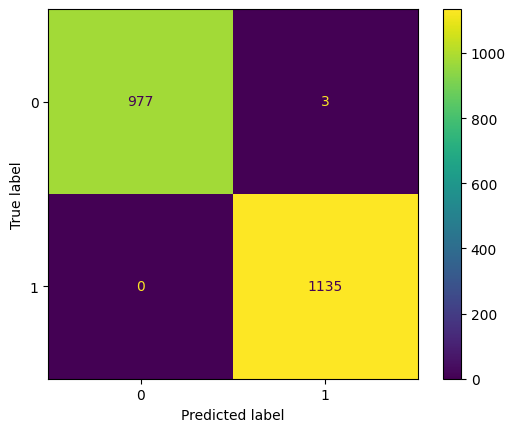

CL TRAIN!!
Epoch 0  CELoss: 0.0943, KLLoss: 0.0090, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.02573060903411645 0.00865114967410381
Validation accuracy (for last task) 0.768595041322314
Fraction of nonzero parameters 0.9999331902119206
Total validation accuracy 0.8866396761133604


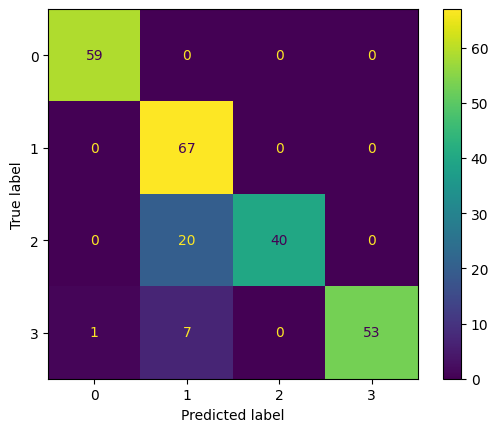

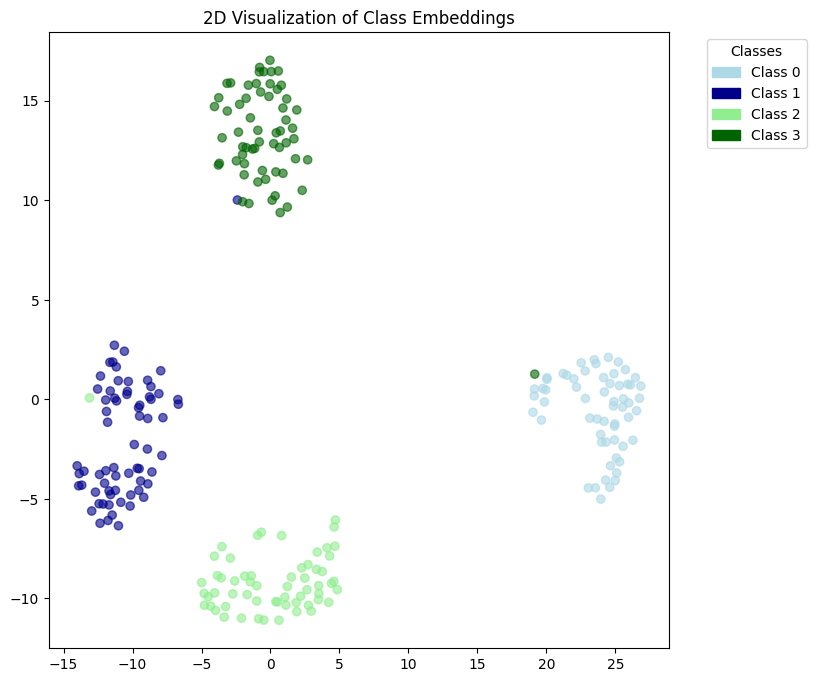



Epoch 1  CELoss: 0.0404, KLLoss: 0.0078, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.016465804118734714 0.0206557565386622
Validation accuracy (for last task) 0.8760330578512396
Fraction of nonzero parameters 0.9999688220988963
Total validation accuracy 0.9190283400809717


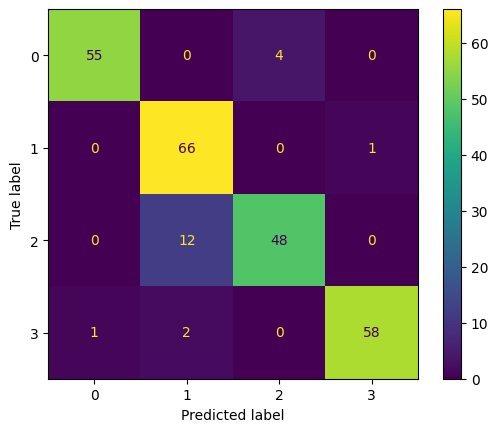

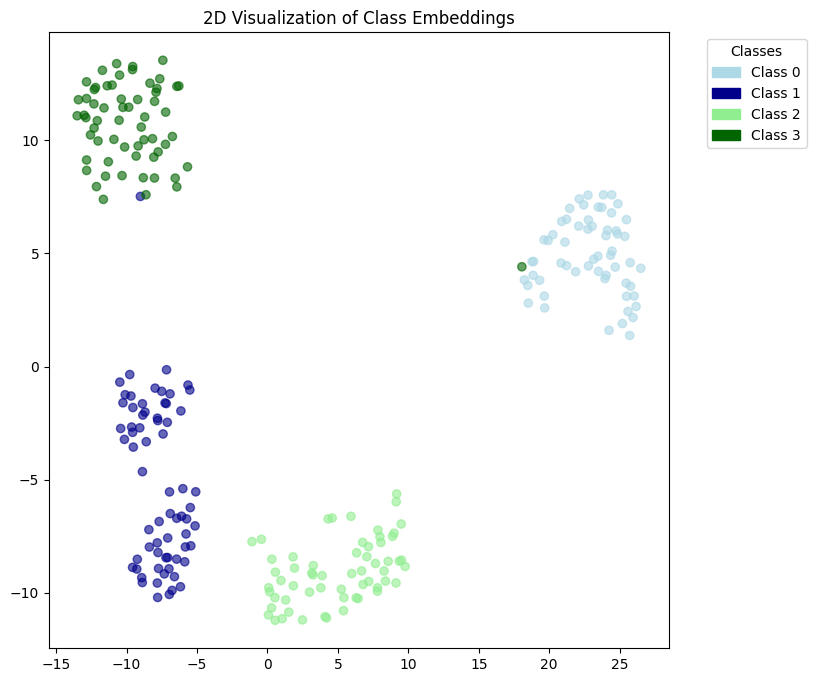



Epoch 2  CELoss: 0.0328, KLLoss: 0.0063, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.019488930845489867 0.008182746286575612
Validation accuracy (for last task) 0.9173553719008265
Fraction of nonzero parameters 0.9999732760847683
Total validation accuracy 0.951417004048583


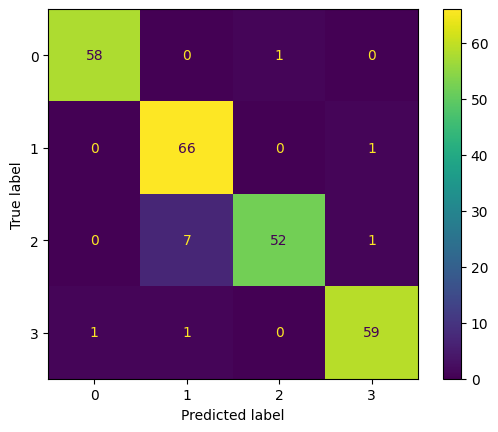

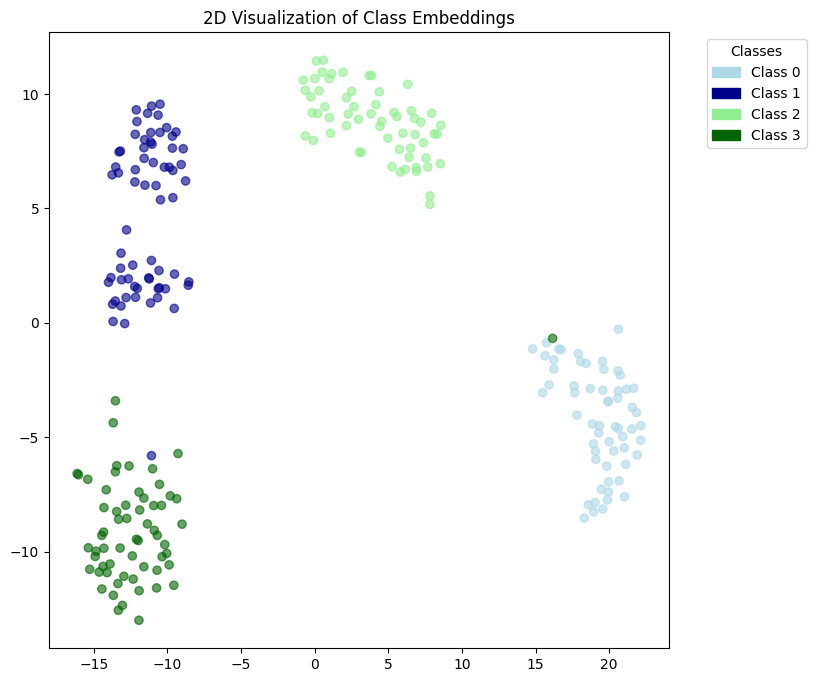



Epoch 3  CELoss: 0.0240, KLLoss: 0.0057, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.01049817031497906 0.005574779437805633
Validation accuracy (for last task) 0.8925619834710744
Fraction of nonzero parameters 0.9999554601412804
Total validation accuracy 0.9433198380566802


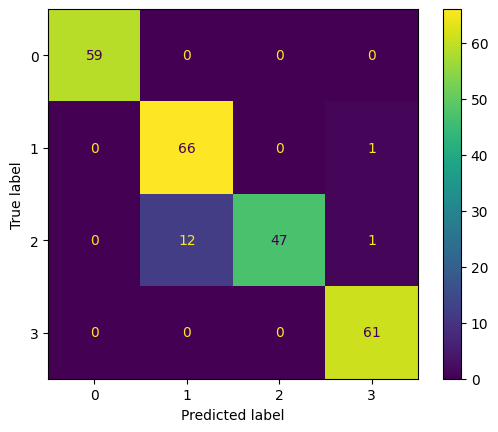

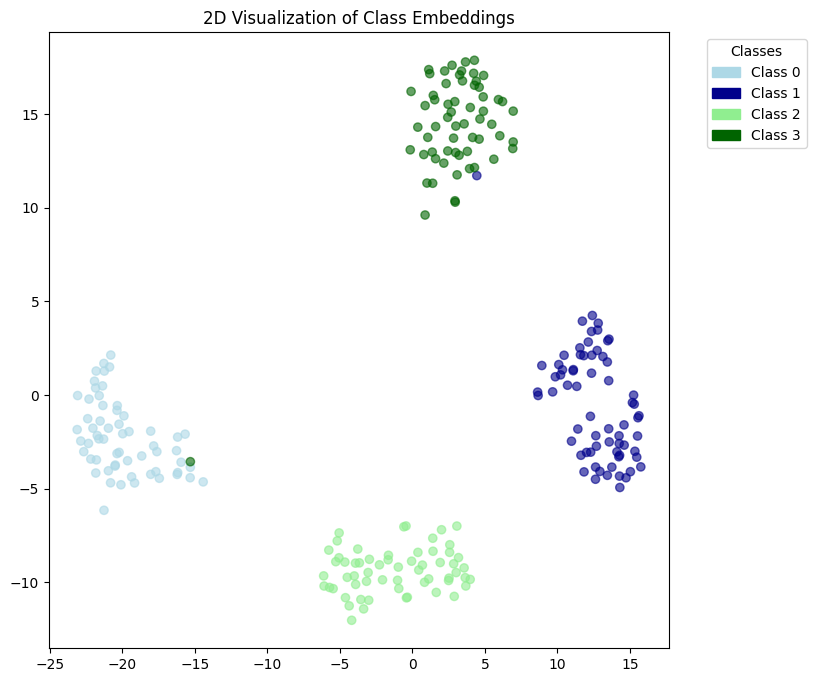

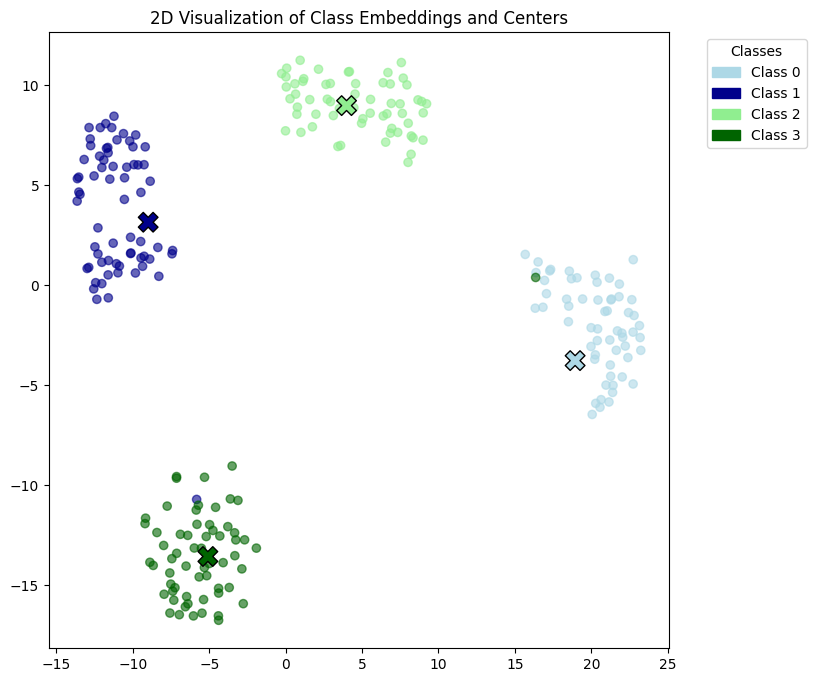

ITERATION 2
ACCURACIES PER SET:
0.9971631205673759 0.9941234084231146 Accuracy on tasks so far: 0.9316815010825115


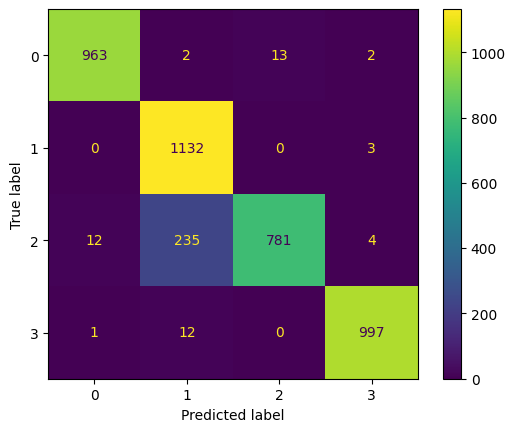

CL TRAIN!!
Epoch 0  CELoss: 0.0400, KLLoss: 0.0078, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.03536705950197453 0.005715133195432524
Validation accuracy (for last task) 0.9017857142857143
Fraction of nonzero parameters 0.9999644294257576
Total validation accuracy 0.8885793871866295


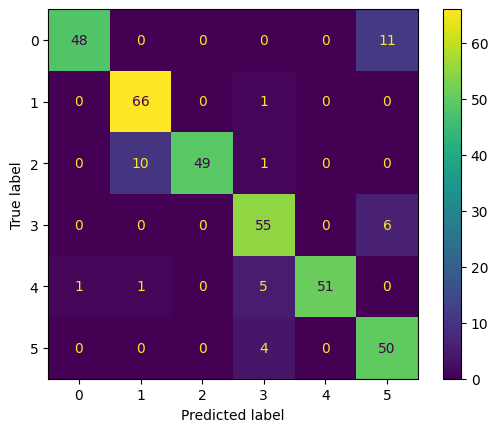

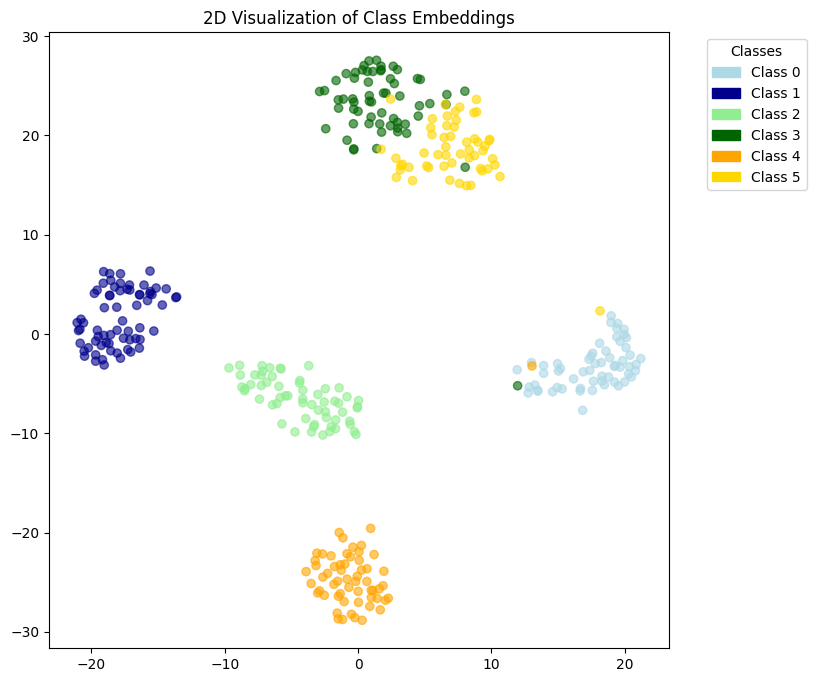



Epoch 1  CELoss: 0.0154, KLLoss: 0.0056, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.020827883485859882 0.006494855721636365
Validation accuracy (for last task) 0.9196428571428571
Fraction of nonzero parameters 0.9999510904604166
Total validation accuracy 0.8941504178272981


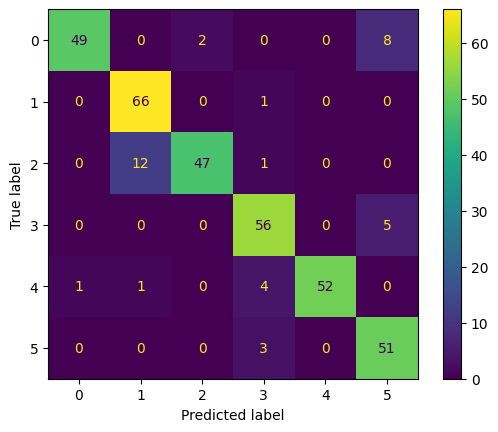

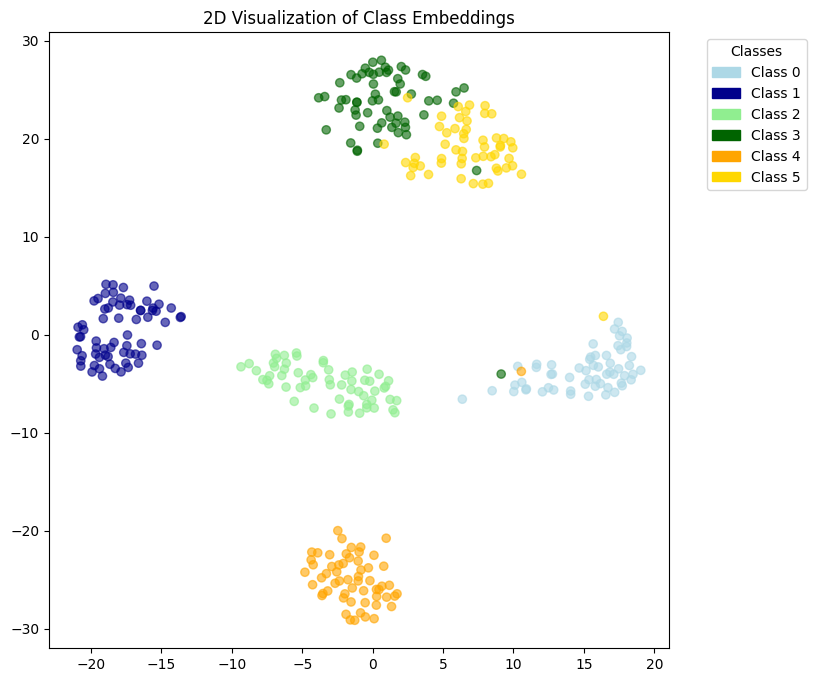

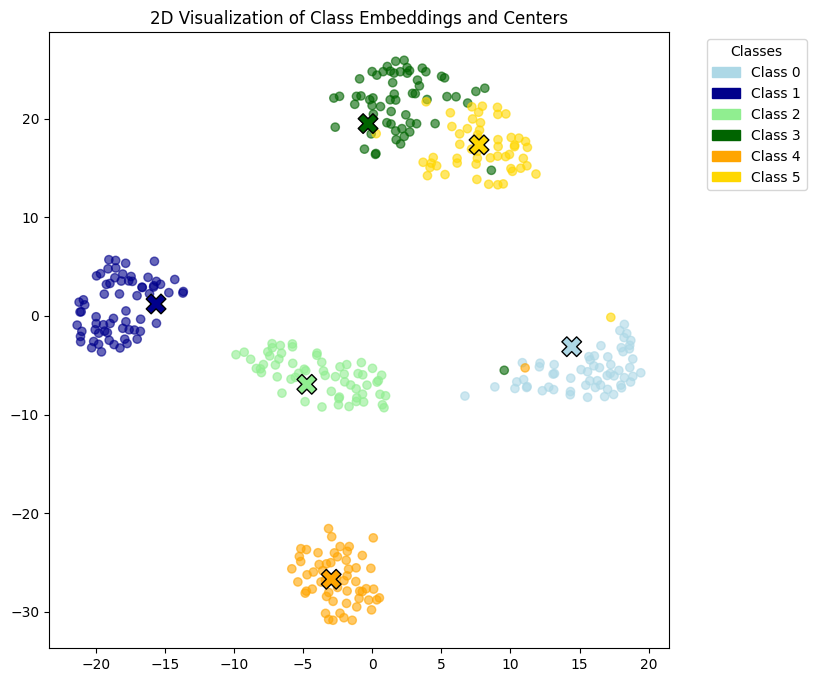

ITERATION 3
ACCURACIES PER SET:
0.9971631205673759 0.9941234084231146 0.9989327641408752 Accuracy on tasks so far: 0.8791245232963024


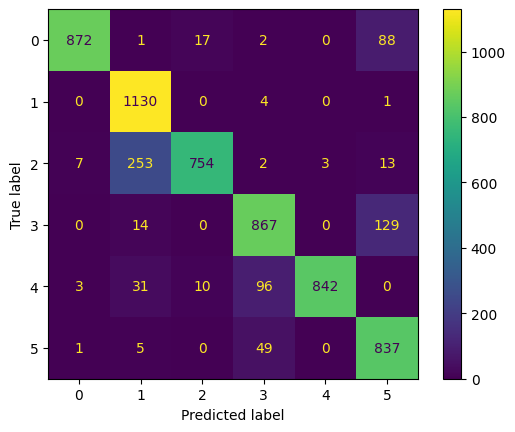

CL TRAIN!!
Epoch 0  CELoss: 0.0274, KLLoss: 0.0048, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.020774794008152988 0.0031173265574929807
Validation accuracy (for last task) 0.8770491803278688
Fraction of nonzero parameters 0.9999201036876587
Total validation accuracy 0.893970893970894


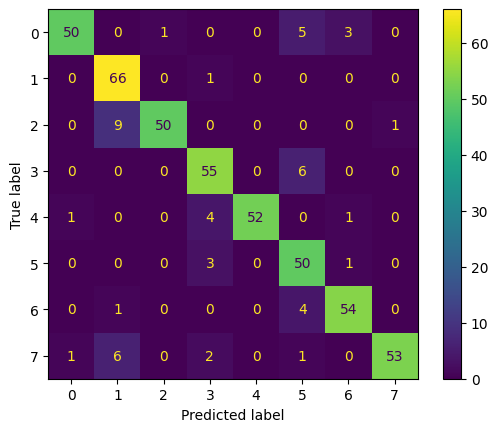

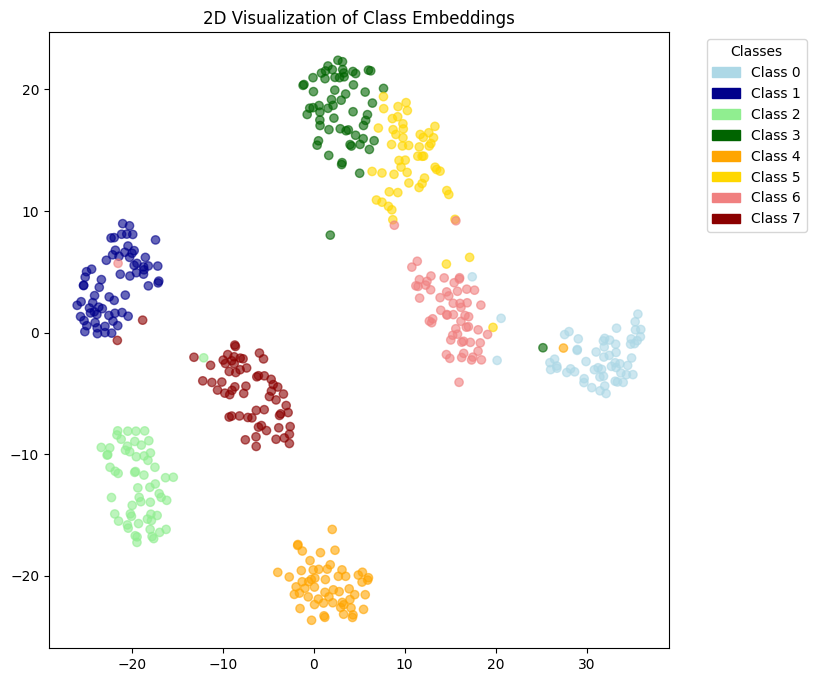

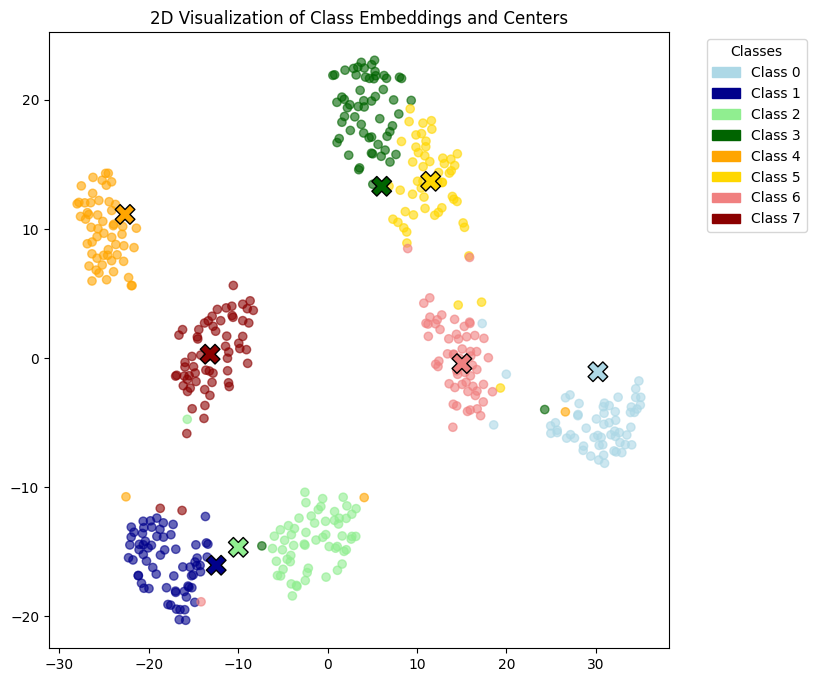

ITERATION 4
ACCURACIES PER SET:
0.9966903073286052 0.9936336924583742 0.9989327641408752 0.9964753272910373 Accuracy on tasks so far: 0.8808781339653237


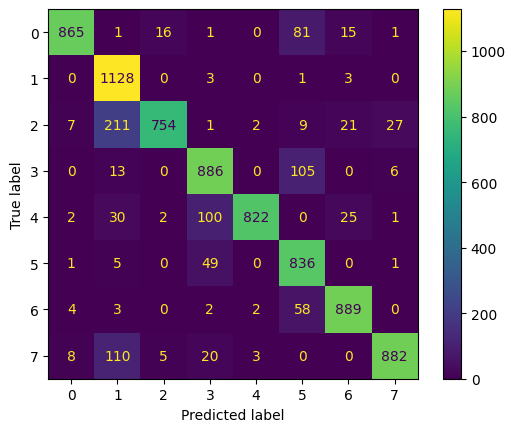

CL TRAIN!!
Epoch 0  CELoss: 0.0516, KLLoss: 0.0085, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.02737978916654053 0.004153527309730028
Validation accuracy (for last task) 0.7563025210084033
Fraction of nonzero parameters 0.9999556892754753
Total validation accuracy 0.8316666666666667


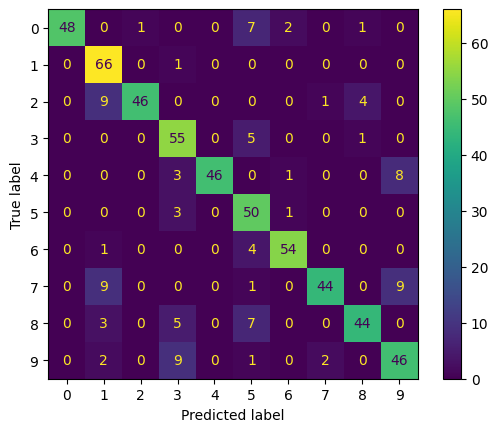

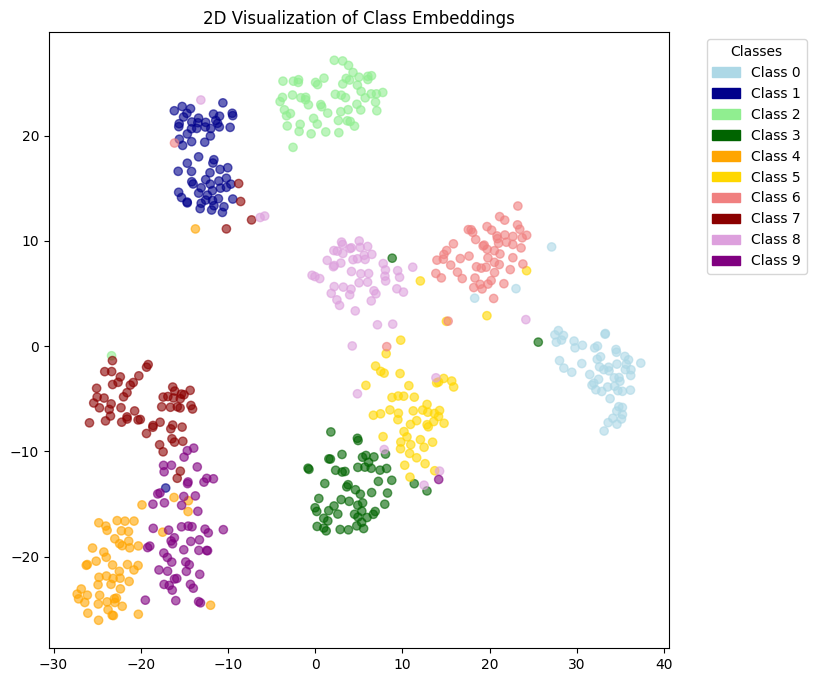



Epoch 1  CELoss: 0.0257, KLLoss: 0.0059, L1Loss: 0.0000, EWCLoss: 0.0000, CenterLoss: 0.0000, InterCenterLoss: 0.0000
Validation losses: 0.009104332508286461 0.012739416628998393
Validation accuracy (for last task) 0.7983193277310925
Fraction of nonzero parameters 0.9999734135652852
Total validation accuracy 0.8183333333333334


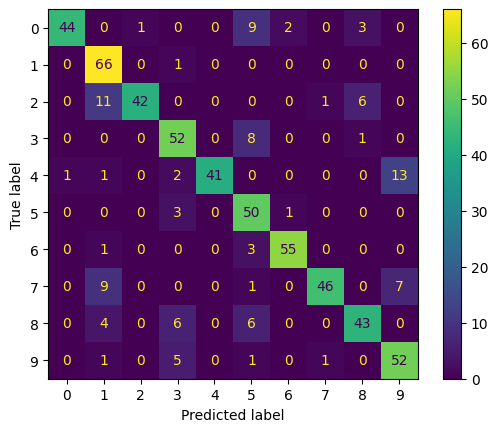

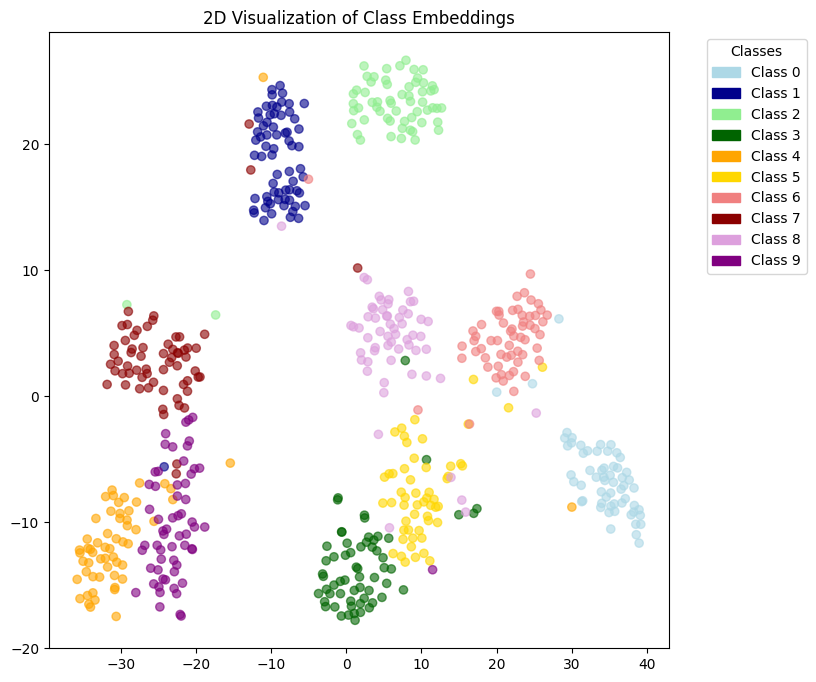

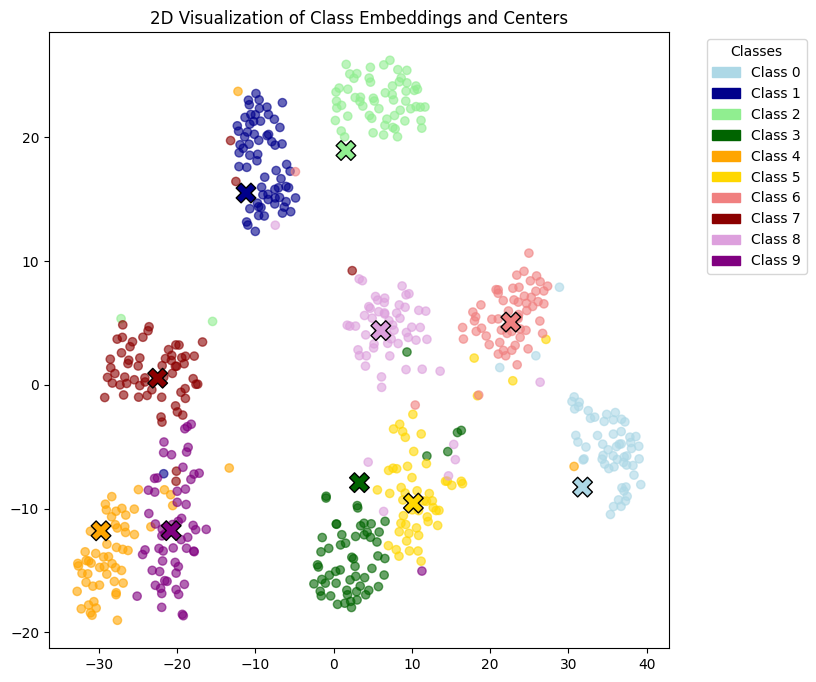

ITERATION 5
ACCURACIES PER SET:
0.9966903073286052 0.9931439764936337 0.9978655282817502 0.9944612286002014 0.9924357034795764 Accuracy on tasks so far: 0.8107


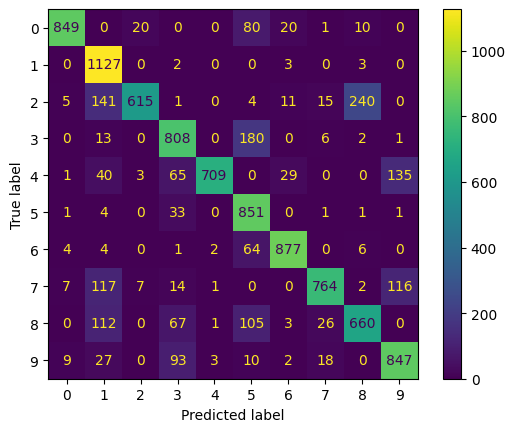

In [4]:
from sklearn import metrics
import matplotlib.pyplot as plt
prevModel = None
for i in range(ITERATIONS):
    model = Net((i+1)*(CLASSES_PER_ITER+1))
    if prevModel is not None:
        with torch.no_grad():
            model.copyPrev(prevModel)
    train_loader = globals.trainloaders[i]
    val_loader = globals.valloaders[i]
    if prevModel:
        print("CL TRAIN!!")
        train_model_CL(model, 
                       prevModel, 
                       train_loader, 
                       val_loader, 
                       i, 
                       True, 
                       1000, 
                       True, 
                       freeze_nonzero_params=False, 
                       l1_loss=0, 
                       ewc_loss = 0, 
                       kd_loss=1,
                       distance_loss=0, 
                       center_loss=0)
        #train_model_CL(model, prevModel, train_loader, val_loader, i, True, 4, True, freeze_nonzero_params=False, l1_reg_strength=0, ewc_reg_strength = 10000//2, kd_reg_strength=1, withBuffer=False, distance_embeddings_strength=0.0001, centerLossStrength=0.02, centerLossCenters=True)
        #train_model_CL(model, prevModel, train_loader, val_loader, i, True, 1000, True, freeze_nonzero_params=False, l1_reg_strength=0.0, ewc_reg_strength = 10000, kd_reg_strength=1, withBuffer=True, distance_embeddings_strength=0)
    else:
        #train_model(model, train_loader, val_loader, True, epochs=3, l1_reg_strength=0, centerLossStrength = 1, withBuffer=True)#, 35)
        train_model(model, 
                    train_loader, 
                    val_loader, 
                    True, 
                    epochs=4, 
                    l1_loss=0, 
                    center_loss = 0)#, 35)
        #train_model(model, train_loader, val_loader, True, epochs=3, l1_reg_strength=0, centerLossStrength = 0.02, withBuffer=False, centerLossCenters=True)#, 35)
    print("ITERATION", i+1)
    print("ACCURACIES PER SET:")
    #fig, axes = plt.subplots(math.ceil((i+1)/3), 3, figsize=(10, 4*math.ceil((i+1)/3)))
    accumPred = []
    all_labels = []
    with torch.no_grad():
        for j in range(i+1):
            val_loader = globals.testloaders[j]
            val_labels = get_labels(val_loader).to(DEVICE)
            all_labels.append(val_labels)
            model.eval()
            pred = model(get_features(val_loader).to(DEVICE))
            model.train()
            accumPred.append(pred)
            sliced_pred = pred[:, j*(CLASSES_PER_ITER+1):(j+1)*(CLASSES_PER_ITER+1)]
            _, predicted = torch.max(sliced_pred, 1)  # Get the class predictions
            predicted += j*CLASSES_PER_ITER
            correct = (predicted == val_labels).sum().item()  # Count how many were correct
            accuracy = correct / val_labels.size(0)  # Accuracy as a percentage
            print(str(accuracy), end=' ')

    accumPred = torch.cat(accumPred)
    all_labels = torch.cat(all_labels)
    predicted = []
    for x in accumPred:
        x_pred = x[[i for i in range(x.size(0)) if (i + 1) % (CLASSES_PER_ITER+1) != 0]]
        x_pred = torch.softmax(x_pred, dim=-1)
        max = 0
        for (k, v) in enumerate(x_pred):
            if v > max:# and x_unc[i//2]/2 < v:
                max = v
                p = k
        predicted.append(p)
    predicted = torch.tensor(predicted).to(DEVICE)
    correct = (predicted == all_labels).sum().item()  # Count how many were correct
    accuracy = correct / all_labels.size(0)  # Accuracy as a percentage
    print("Accuracy on tasks so far:", accuracy)
    plot_confusion_matrix(predicted.cpu(), all_labels.cpu(), list(range(CLASSES_PER_ITER*(i+1))))
    prevModel = copy.deepcopy(model)